In [1]:
#Importing the necessary packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
import seaborn as sns
import string

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the dataset:

data=pd.read_excel("Election_Data.xlsx")

In [3]:
data.size

15250

In [4]:
data.shape

(1525, 10)

In [5]:
data.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1.0,Labour,43.0,3.0,3.0,4.0,1.0,2.0,2.0,female
1,2.0,Labour,36.0,4.0,4.0,4.0,4.0,5.0,2.0,male
2,3.0,Labour,35.0,4.0,4.0,5.0,2.0,3.0,2.0,male
3,4.0,Labour,24.0,4.0,2.0,2.0,1.0,4.0,0.0,female
4,5.0,Labour,41.0,2.0,2.0,1.0,1.0,6.0,2.0,male
5,6.0,Labour,47.0,3.0,4.0,4.0,4.0,4.0,2.0,male
6,7.0,Labour,57.0,2.0,2.0,4.0,4.0,11.0,2.0,male
7,8.0,Labour,77.0,3.0,4.0,4.0,1.0,1.0,0.0,male
8,9.0,Labour,39.0,3.0,3.0,4.0,4.0,11.0,0.0,female
9,10.0,Labour,70.0,3.0,2.0,5.0,1.0,11.0,2.0,male


In [6]:
#Dropping unnecessary column:

data=data.drop('Unnamed: 0',axis=1)

In [7]:
data.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43.0,3.0,3.0,4.0,1.0,2.0,2.0,female
1,Labour,36.0,4.0,4.0,4.0,4.0,5.0,2.0,male
2,Labour,35.0,4.0,4.0,5.0,2.0,3.0,2.0,male
3,Labour,24.0,4.0,2.0,2.0,1.0,4.0,0.0,female
4,Labour,41.0,2.0,2.0,1.0,1.0,6.0,2.0,male
5,Labour,47.0,3.0,4.0,4.0,4.0,4.0,2.0,male
6,Labour,57.0,2.0,2.0,4.0,4.0,11.0,2.0,male
7,Labour,77.0,3.0,4.0,4.0,1.0,1.0,0.0,male
8,Labour,39.0,3.0,3.0,4.0,4.0,11.0,0.0,female
9,Labour,70.0,3.0,2.0,5.0,1.0,11.0,2.0,male


In [8]:
#checking data types:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1525 non-null   object 
 1   age                      1525 non-null   float64
 2   economic.cond.national   1525 non-null   float64
 3   economic.cond.household  1525 non-null   float64
 4   Blair                    1525 non-null   float64
 5   Hague                    1525 non-null   float64
 6   Europe                   1525 non-null   float64
 7   political.knowledge      1525 non-null   float64
 8   gender                   1525 non-null   object 
dtypes: float64(7), object(2)
memory usage: 107.4+ KB


In [9]:
data.describe(include='all')

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [10]:
#Checking for missing values:

data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [11]:
#Checking for duplicate values:

data.duplicated().sum()

8

In [12]:
data[data.duplicated()]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35.0,4.0,4.0,5.0,2.0,3.0,2.0,male
626,Labour,39.0,3.0,4.0,4.0,2.0,5.0,2.0,male
870,Labour,38.0,2.0,4.0,2.0,2.0,4.0,3.0,male
983,Conservative,74.0,4.0,3.0,2.0,4.0,8.0,2.0,female
1154,Conservative,53.0,3.0,4.0,2.0,2.0,6.0,0.0,female
1236,Labour,36.0,3.0,3.0,2.0,2.0,6.0,2.0,female
1244,Labour,29.0,4.0,4.0,4.0,2.0,2.0,2.0,female
1438,Labour,40.0,4.0,3.0,4.0,2.0,2.0,2.0,male


In [13]:
#Dropping duplicate values:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [14]:
#Checking unique counts for all variables:

for feature in data.columns: 
        print(feature)
        print(data[feature].value_counts())
        print(data[feature].nunique())
        print('\n')

vote
Labour          1057
Conservative     460
Name: vote, dtype: int64
2


age
37.0    42
49.0    39
35.0    38
47.0    38
46.0    37
        ..
87.0     3
92.0     2
90.0     1
93.0     1
91.0     1
Name: age, Length: 70, dtype: int64
70


economic.cond.national
3.0    604
4.0    538
2.0    256
5.0     82
1.0     37
Name: economic.cond.national, dtype: int64
5


economic.cond.household
3.0    645
4.0    435
2.0    280
5.0     92
1.0     65
Name: economic.cond.household, dtype: int64
5


Blair
4.0    833
2.0    434
5.0    152
1.0     97
3.0      1
Name: Blair, dtype: int64
5


Hague
2.0    617
4.0    557
1.0    233
5.0     73
3.0     37
Name: Hague, dtype: int64
5


Europe
11.0    338
6.0     207
3.0     128
4.0     126
5.0     123
9.0     111
8.0     111
1.0     109
10.0    101
7.0      86
2.0      77
Name: Europe, dtype: int64
11


political.knowledge
2.0    776
0.0    454
3.0    249
1.0     38
Name: political.knowledge, dtype: int64
4


gender
female    808
male      709
Name: gend

In [15]:
#Checking for skewness in the data:

data.skew()


age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

## Univariate analysis:

In [16]:
numerical=['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']
categorical=['vote','gender']

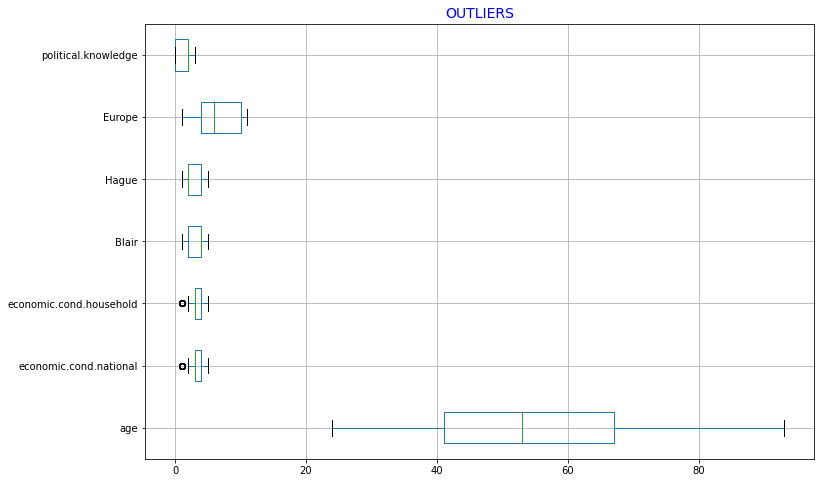

In [17]:
#Checking for outliers:

plt.figure(figsize=(12,8))
data[numerical].boxplot(vert=0)
plt.title('OUTLIERS',color='blue',fontsize=14)
plt.show()


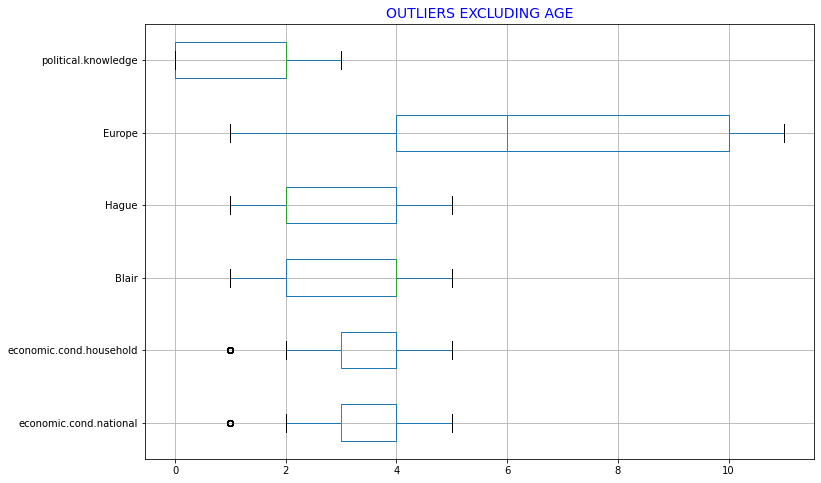

In [18]:
#Checking for outliers without 'age':

plt.figure(figsize=(12,8))
data[numerical].drop(['age'],axis=1).boxplot(vert=0)
plt.title('OUTLIERS EXCLUDING AGE',color='blue',fontsize=14)
plt.show()

In [19]:
#Treating the outliers:

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [20]:
for column in data[numerical].columns:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

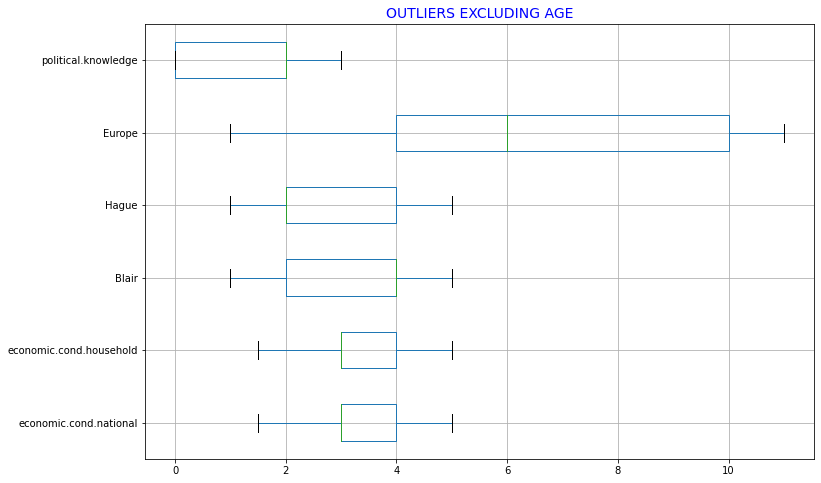

In [21]:
#Re-checking for outliers without 'age':

plt.figure(figsize=(12,8))
data[numerical].drop(['age'],axis=1).boxplot(vert=0)
plt.title('OUTLIERS EXCLUDING AGE',color='blue',fontsize=14)
plt.show()

Text(0, 0.5, 'COUNT')

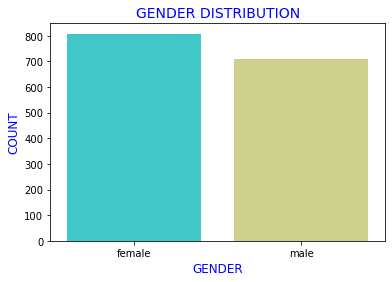

In [22]:
sns.countplot(x=data['gender'],data=data,palette='rainbow')
plt.title('GENDER DISTRIBUTION',color='blue',fontsize=14)
plt.xlabel('GENDER',color='blue',fontsize=12)
plt.ylabel('COUNT',color='blue',fontsize=12)

Text(0, 0.5, 'COUNT')

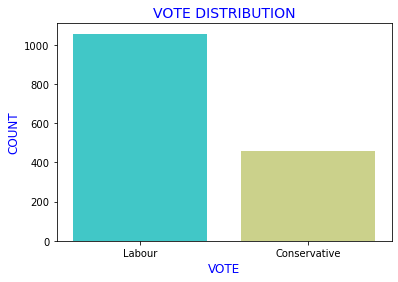

In [23]:
sns.countplot(x=data['vote'],data=data,palette='rainbow')
plt.title('VOTE DISTRIBUTION',color='blue',fontsize=14)
plt.xlabel('VOTE',color='blue',fontsize=12)
plt.ylabel('COUNT',color='blue',fontsize=12)

## Bivariate analysis:

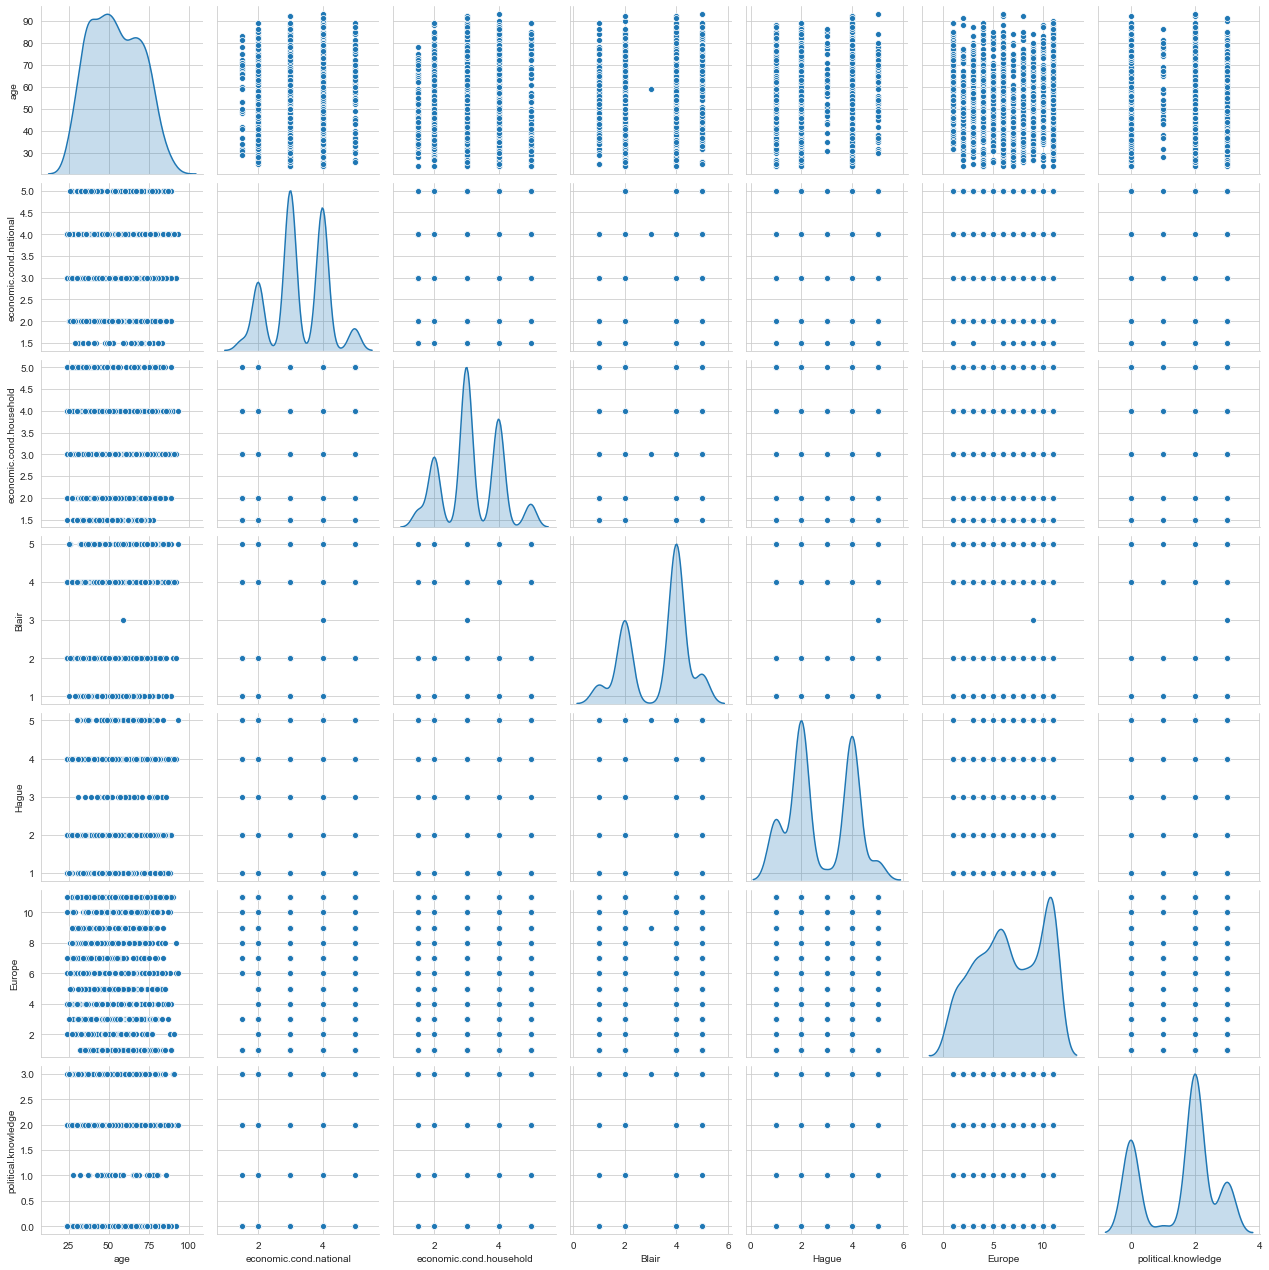

In [24]:
#Plotting pairplot to see relation between variables:

sns.set_style('whitegrid')
sns.pairplot(data=data,diag_kind="kde")

plt.show()

Text(0.5, 1.0, 'CORRELATION MATRIX')

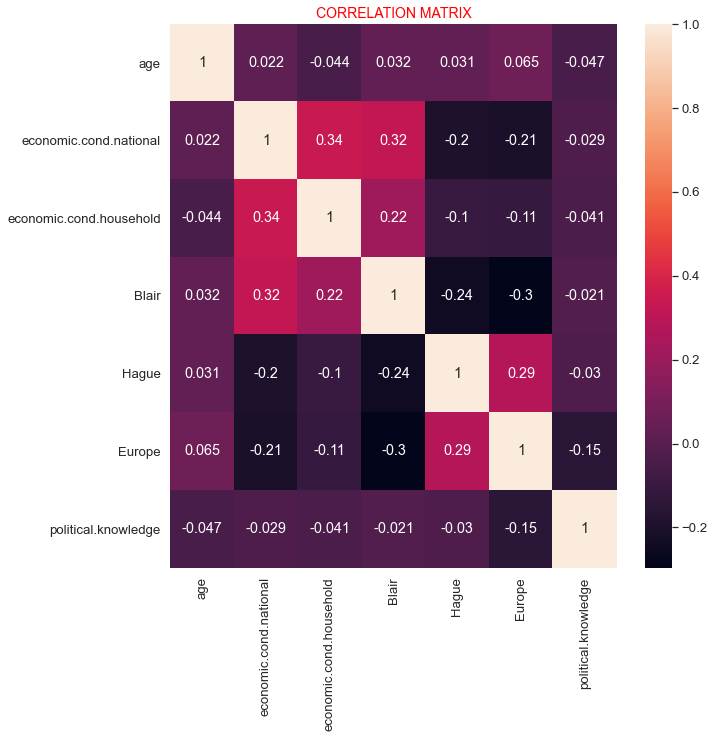

In [25]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)
sns.heatmap(data.corr(),annot=True)
plt.title('CORRELATION MATRIX',color='red',fontsize=14)

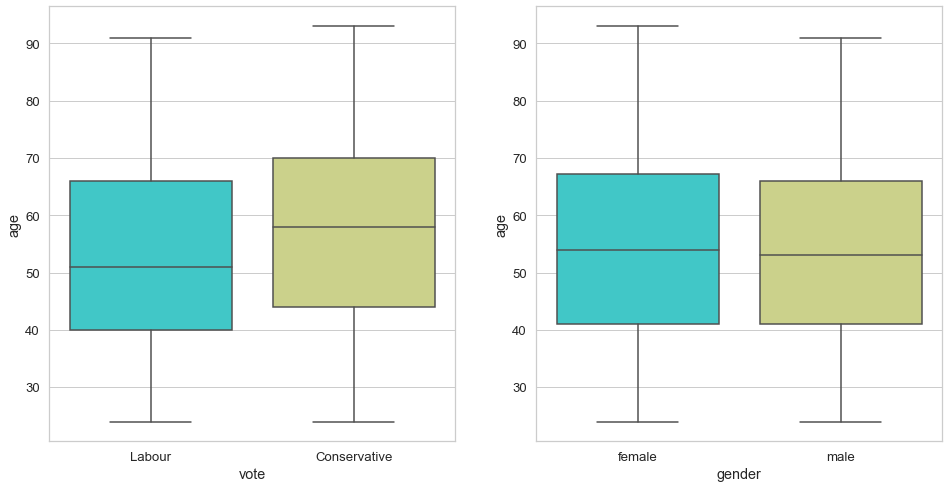

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(x=data['vote'],y=data['age'],data=data,palette='rainbow')
plt.subplot(1,2,2)
sns.boxplot(x=data['gender'],y=data['age'],data=data,palette='rainbow')


Text(0.5, 1.0, 'AGE-WISE & GENDER-WISE DISTRIBUTION OF VOTERS')

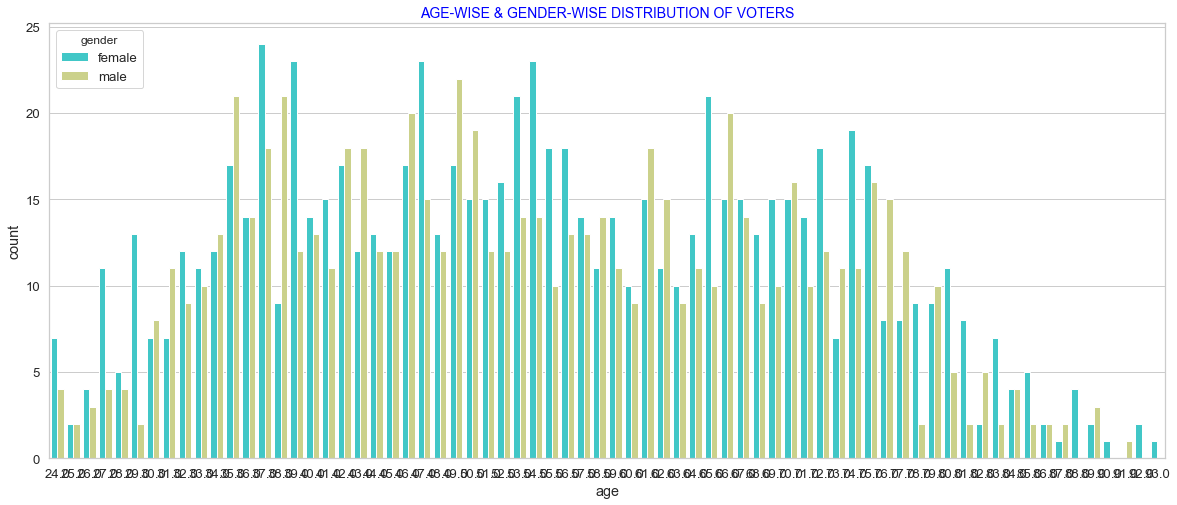

In [27]:
fig=plt.figure(figsize=(20,8))
sns.countplot(x=data['age'],data=data,palette='rainbow',hue=data['gender'])
plt.title('AGE-WISE & GENDER-WISE DISTRIBUTION OF VOTERS',color='blue',fontsize=14)

Text(0.5, 1.0, 'AGE-WISE & PARTY-WISE DISTRIBUTION OF VOTERS')

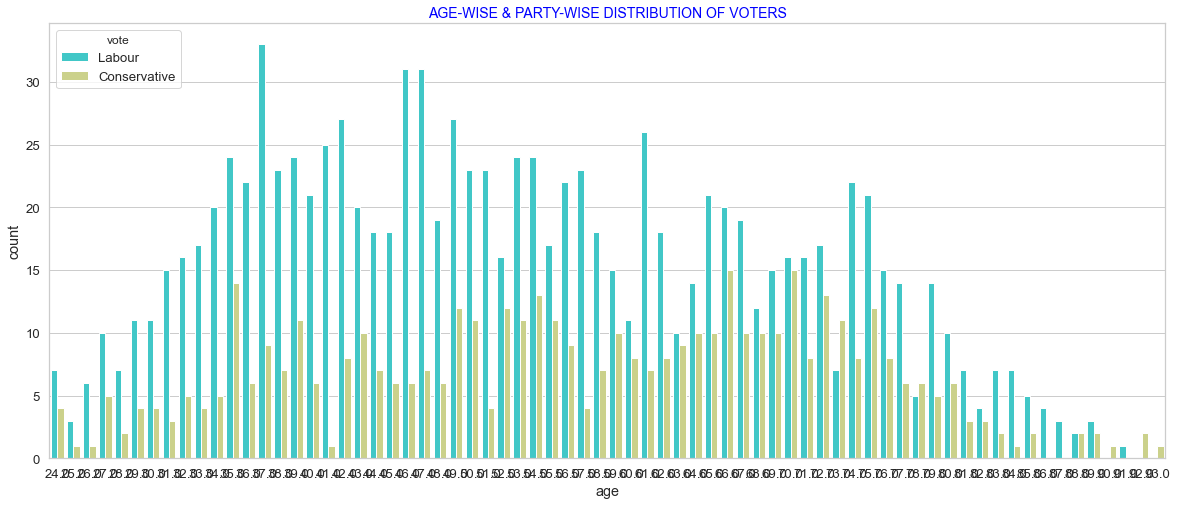

In [28]:
fig=plt.figure(figsize=(20,8))
sns.countplot(x=data['age'],data=data,palette='rainbow',hue=data['vote'])
plt.title('AGE-WISE & PARTY-WISE DISTRIBUTION OF VOTERS',color='blue',fontsize=14)

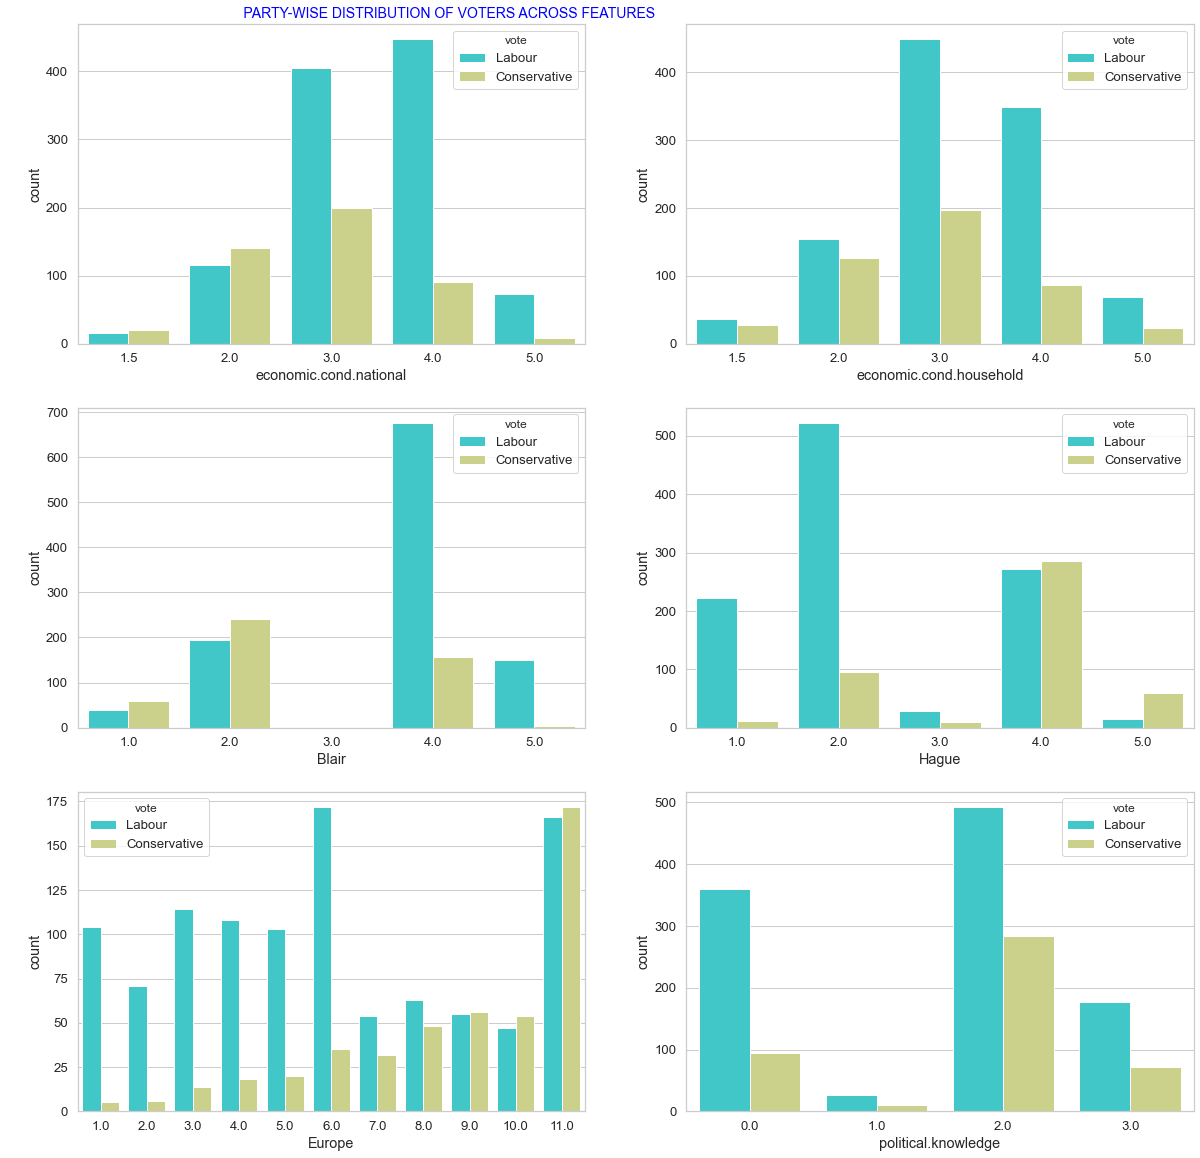

In [29]:
fig=plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.countplot(data['economic.cond.national'],palette='rainbow',hue=data['vote'])
plt.title('                                                             PARTY-WISE DISTRIBUTION OF VOTERS ACROSS FEATURES',color='blue',fontsize=14)
plt.subplot(3,2,2)
sns.countplot(data['economic.cond.household'],palette='rainbow',hue=data['vote'])
plt.subplot(3,2,3)
sns.countplot(data['Blair'],palette='rainbow',hue=data['vote'])
plt.subplot(3,2,4)
sns.countplot(data['Hague'],palette='rainbow',hue=data['vote'])
plt.subplot(3,2,5)
sns.countplot(data['Europe'],palette='rainbow',hue=data['vote'])
plt.subplot(3,2,6)
sns.countplot(data['political.knowledge'],palette='rainbow',hue=data['vote'])


In [30]:
pd.crosstab(data.Europe,data.vote,margins=True,values=data.age,aggfunc='mean')

vote,Conservative,Labour,All
Europe,,,
1.0,61.400000,61.336538,61.339450
2.0,62.000000,51.816901,52.610390
3.0,58.857143,53.728070,54.289062
4.0,55.444444,49.268519,50.150794
5.0,55.750000,48.757282,49.894309
6.0,58.600000,51.197674,52.449275
7.0,52.593750,46.370370,48.686047
8.0,53.416667,50.412698,51.711712
9.0,53.267857,51.854545,52.567568


In [31]:
pd.crosstab(data.Europe,data.vote,margins=True,values=data.Blair,aggfunc='count')

vote,Conservative,Labour,All
Europe,,,
1.0,5,104,109
2.0,6,71,77
3.0,14,114,128
4.0,18,108,126
5.0,20,103,123
6.0,35,172,207
7.0,32,54,86
8.0,48,63,111
9.0,56,55,111


In [32]:
pd.crosstab(data.vote,data.gender,margins=True,values=data.age,aggfunc='mean')

gender,female,male,All
vote,,,
Conservative,58.252918,55.054187,56.841304
Labour,52.756806,53.494071,53.109745
All,54.504950,53.940762,54.241266


In [33]:
pd.crosstab(data.vote,data.gender,margins=True,values=data.gender,aggfunc='count')

gender,female,male,All
vote,,,
Conservative,257,203,460
Labour,551,506,1057
All,808,709,1517


## Logistic Regression (LR) model:

In [34]:
#Creating a copy of the dataset before model building:

data1=data.copy()
data1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43.0,3.0,3.0,4.0,1.0,2.0,2.0,female
1,Labour,36.0,4.0,4.0,4.0,4.0,5.0,2.0,male
2,Labour,35.0,4.0,4.0,5.0,2.0,3.0,2.0,male
3,Labour,24.0,4.0,2.0,2.0,1.0,4.0,0.0,female
4,Labour,41.0,2.0,2.0,1.0,1.0,6.0,2.0,male


In [35]:
#Converting object type data to categorical codes:
code1={"Labour":0, "Conservative":1}
data1["vote"]=data1["vote"].replace(code1)

code2={"female":0, "male":1}
data1["gender"]=data1["gender"].replace(code2)


In [36]:
#Rechecking datatypes:

data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1517 non-null   int64  
 1   age                      1517 non-null   float64
 2   economic.cond.national   1517 non-null   float64
 3   economic.cond.household  1517 non-null   float64
 4   Blair                    1517 non-null   float64
 5   Hague                    1517 non-null   float64
 6   Europe                   1517 non-null   float64
 7   political.knowledge      1517 non-null   float64
 8   gender                   1517 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 150.8 KB


In [37]:
#Cross-checking the categorical coding:
for column in data1[['vote', 'gender']]:
    print(data1[column].value_counts().sort_values())
    print('\n')

1     460
0    1057
Name: vote, dtype: int64


1    709
0    808
Name: gender, dtype: int64




In [38]:
#Checking the coded data:

data1.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,0,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,0,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,0,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,0,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1
5,0,47.0,3.0,4.0,4.0,4.0,4.0,2.0,1
6,0,57.0,2.0,2.0,4.0,4.0,11.0,2.0,1
7,0,77.0,3.0,4.0,4.0,1.0,1.0,0.0,1
8,0,39.0,3.0,3.0,4.0,4.0,11.0,0.0,0
9,0,70.0,3.0,2.0,5.0,1.0,11.0,2.0,1


In [39]:
data1.tail(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1515,1,82.0,2.0,2.0,2.0,1.0,11.0,2.0,0
1516,0,30.0,3.0,4.0,4.0,2.0,4.0,2.0,1
1517,0,76.0,4.0,3.0,2.0,2.0,11.0,2.0,1
1518,0,50.0,3.0,4.0,4.0,2.0,5.0,2.0,1
1519,1,35.0,3.0,4.0,4.0,2.0,8.0,2.0,1
1520,1,67.0,5.0,3.0,2.0,4.0,11.0,3.0,1
1521,1,73.0,2.0,2.0,4.0,4.0,8.0,2.0,1
1522,0,37.0,3.0,3.0,5.0,4.0,2.0,2.0,1
1523,1,61.0,3.0,3.0,1.0,4.0,11.0,2.0,1
1524,1,74.0,2.0,3.0,2.0,4.0,11.0,0.0,0


In [40]:
#Splitting the data into train and test sets:

x = data1.drop('vote', axis=1)
y = data1[['vote']]

In [41]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


In [42]:
#Splitting the dataset in the 70:30 ratio:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)
print("Shape of train dataset:",x_train.shape,y_train.shape)
print("Shape of test dataset:",x_test.shape,y_test.shape)


Shape of train dataset: (1061, 8) (1061, 1)
Shape of test dataset: (456, 8) (456, 1)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [44]:
# Fitting the Logistic Regression model:

model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(x_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [45]:
#Predicting on training and test data:

ytrain_predict = model.predict(x_train)
ytest_predict = model.predict(x_test)

In [46]:
#Checking predicted class and probabilities:

ytest_predict_prob=model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.573451,0.426549
1,0.848543,0.151457
2,0.993509,0.006491
3,0.157326,0.842674
4,0.936467,0.063533


In [47]:
#Finding accuracy of training data:

lr_train_acc=model.score(x_train, y_train)
lr_train_acc

0.8341187558906692

AUC: 0.890


Text(0.5, 1.0, 'ROC Curve - Training data')

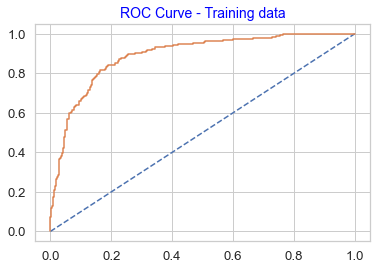

In [48]:
#Calculating AUC and plotting ROC curve for training data:

probs = model.predict_proba(x_train)
probs = probs[:, 1]

lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)

%matplotlib inline
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);
plt.title("ROC Curve - Training data",color='blue',fontsize=14)

In [49]:
# Finding Accuracy for Test Data:

lr_test_acc=model.score(x_test, y_test)
lr_test_acc

0.8289473684210527

AUC: 0.883


Text(0.5, 1.0, 'ROC Curve - Testing data')

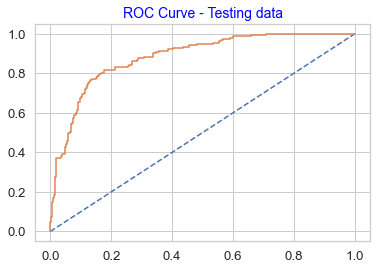

In [50]:
##Calculating AUC and plotting ROC curve for test data:

probs = model.predict_proba(x_test)
probs = probs[:, 1]

lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);
plt.title("ROC Curve - Testing data",color='blue',fontsize=14)

In [51]:
#Building confusion matrix for training data: 

confusion_matrix(y_train, ytrain_predict)

array([[688,  66],
       [110, 197]])

Text(0.5, 1.0, 'Confusion matrix - Training data')

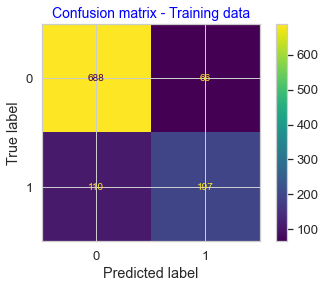

In [52]:
#Plotting confusion matrix for training data:

plot_confusion_matrix(model,x_train,y_train);
plt.title("Confusion matrix - Training data",color='blue',fontsize=14)

In [53]:
#Classification report for train data:

print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.75      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [54]:
#Building confusion matrix for test data:

confusion_matrix(y_test, ytest_predict)

array([[267,  36],
       [ 42, 111]])

Text(0.5, 1.0, 'Confusion matrix - Test data')

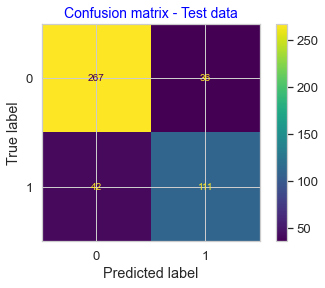

In [55]:
#Plotting confusion matrix for test data:

plot_confusion_matrix(model,x_test,y_test);
plt.title("Confusion matrix - Test data",color='blue',fontsize=14)

In [56]:
#Classification report for test data:

print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.76      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [57]:
#Storing data for future comparison:

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
Log_reg_data = pd.DataFrame({'Log-reg Train':[0.834,0.890,0.64,0.75,0.69],
                     'Log-reg Test':[0.829,0.883,0.73,0.76,0.74]},index=index)
round(Log_reg_data,2)

,Log-reg Train,Log-reg Test
Accuracy,0.83,0.83
AUC,0.89,0.88
Recall,0.64,0.73
Precision,0.75,0.76
F1 Score,0.69,0.74


## Linear Discriminant Ananlysis (LDA):

In [58]:
#Creating a copy of dataset to perform LDA:

data2=data1.copy()
data2.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,0,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,0,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,0,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,0,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


In [59]:
#Splitting the data into train and test sets:

X = data2.drop('vote', axis=1)
Y = data2[['vote']]

In [60]:
#Splitting the dataset in the 70:30 ratio:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)
print("Shape of train dataset:",x_train.shape,y_train.shape)
print("Shape of test dataset:",x_test.shape,y_test.shape)


Shape of train dataset: (1061, 8) (1061, 1)
Shape of test dataset: (456, 8) (456, 1)


In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [62]:
#Building LDA Model:

clf = LinearDiscriminantAnalysis()
model=clf.fit(x_train,y_train)

In [63]:
#Making predictions on the training data with 0.5 cut-off value:

pred_class_train = model.predict(x_train)

# Test Data Class Prediction with a cut-off value of 0.5:
pred_class_test = model.predict(x_test)

Text(0.5, 1.0, 'Confusion matrix - Training Data')

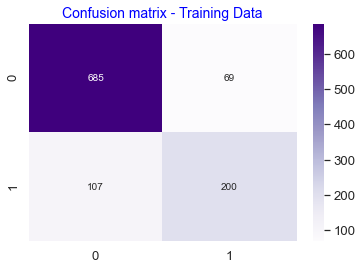

In [64]:
#Plotting confusion matrix for training data:

sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Purples');
plt.title('Confusion matrix - Training Data',color='blue',fontsize=14)

Text(0.5, 1.0, 'Confusion matrix - Test Data')

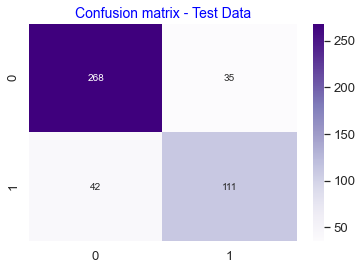

In [65]:
#Plotting confusion matrix for test data:

sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Purples');
plt.title('Confusion matrix - Test Data',color='blue',fontsize=14)

In [66]:
#Classification report for training and test:

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.76      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [67]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(x_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(x_test)

In [68]:
#Predicting the probabilities on the test data:

y_test_predict_prob=model.predict_proba(x_test)
pd.DataFrame(y_test_predict_prob).head()

,0,1
0,0.534030,0.465970
1,0.862499,0.137501
2,0.994003,0.005997
3,0.133899,0.866101
4,0.946337,0.053663


AUC for the Training Data: 0.890


Text(0.5, 1.0, 'ROC Curve - Training data')

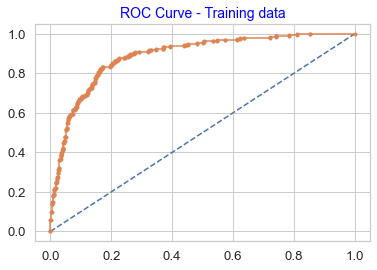

In [69]:
# AUC and ROC for the training data:

auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate and plot roc curve:
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
plt.title("ROC Curve - Training data",color='blue',fontsize=14)

AUC for the Test Data: 0.888


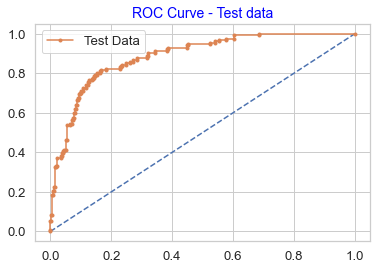

In [70]:
# AUC and ROC for the test data:

# calculate AUC:
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate and plot roc curve:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.title("ROC Curve - Test data",color='blue',fontsize=14)
plt.legend(loc='best')
plt.show()


In [71]:
#Storing data for future comparison:

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
LDA_data = pd.DataFrame({'LDA Train':[0.83,0.89,0.65,0.74,0.69],
                     'LDA Test':[0.83,0.88,0.73,0.76,0.74]},index=index)
round(LDA_data,2)

,LDA Train,LDA Test
Accuracy,0.83,0.83
AUC,0.89,0.88
Recall,0.65,0.73
Precision,0.74,0.76
F1 Score,0.69,0.74


## K-Nearest Neighbors (KNN) model:

In [106]:
#Creating a copy of dataset to build KNN model:

data3=data1.copy()
data3.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,0,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,0,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,0,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,0,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


In [107]:
#Splitting the data into train and test sets:

x = data3.drop('vote', axis=1)
y = data3[['vote']]

In [108]:
#Splitting the dataset in the 70:30 ratio:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)
print("Shape of train dataset:",x_train.shape,y_train.shape)
print("Shape of test dataset:",x_test.shape,y_test.shape)


Shape of train dataset: (1061, 8) (1061, 1)
Shape of test dataset: (456, 8) (456, 1)


In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
#Building the KNN model:

knn=KNeighborsClassifier(n_neighbors=5,weights='distance')

In [112]:
# Calling the Nearest Neighbour algorithm

knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [78]:
#Evaluating the KNN model:


In [113]:
# Performance Matrix on train data set:

y_train_predict = knn.predict(x_train)
model_score = knn.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[754   0]
 [  0 307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       307

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [114]:
# Performance Matrix on test data set:

y_test_predict = knn.predict(x_test)
model_score = knn.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[272  31]
 [ 54  99]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       303
           1       0.76      0.65      0.70       153

    accuracy                           0.81       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



In [115]:
#Storing data for future comparison:

index=['Model score','Recall','Precision','F1 Score']
knn_data = pd.DataFrame({'KNN Train':[1.0,1.0,1.0,1.0],
                     'KNN Test':[0.81,0.65,0.76,0.70]},index=index)
round(knn_data,2)

,KNN Train,KNN Test
Model score,1.0,0.81
Recall,1.0,0.65
Precision,1.0,0.76
F1 Score,1.0,0.70


## Applying KNN model to scaled data:

In [116]:
from scipy.stats import zscore

In [117]:
#Splitting the data into train and test sets:

x = data3.drop('vote', axis=1)
y = data3[['vote']]

In [118]:
x_scaled=x.apply(zscore)  # convert all attributes to Z scale 

x_scaled.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [122]:
# Splitting x and y into training and test set in 70:30 ratio:

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=1)

In [123]:
#Building the KNN model:

knn=KNeighborsClassifier(n_neighbors=5,weights='distance')

In [124]:
# Calling the Nearest Neighbour algorithm

knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [88]:
#Evaluating the KNN model on scaled data:

In [125]:
# Performance Matrix on train data set:

y_train_predict = knn.predict(x_train)
model_score = knn.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[754   0]
 [  0 307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       307

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [126]:
# Performance Matrix on test data set:

y_test_predict = knn.predict(x_test)
model_score = knn.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[270  33]
 [ 47 106]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       303
           1       0.76      0.69      0.73       153

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



In [127]:
#Storing data for future comparison:

index=['Model score','Recall','Precision','F1 Score']
scaled_knn_data = pd.DataFrame({'Scaled-KNN Train':[1.0,1.0,1.0,1.0],
                     'Scaled-KNN Test':[0.82,0.69,0.76,0.73]},index=index)
round(scaled_knn_data,2)

,Scaled-KNN Train,Scaled-KNN Test
Model score,1.0,0.82
Recall,1.0,0.69
Precision,1.0,0.76
F1 Score,1.0,0.73


## Gaussian Naive Bayes (GNB) model:

In [128]:
#Creating a copy of dataset to build GNB model:

data4=data1.copy()
data4.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,0,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,0,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,0,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,0,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


In [129]:
#Splitting the data into train and test sets:

x = data4.drop('vote', axis=1)
y = data4[['vote']]

In [130]:
from sklearn.naive_bayes import GaussianNB

In [131]:
#Splitting the dataset in the 70:30 ratio:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)
print("Shape of train dataset:",x_train.shape,y_train.shape)
print("Shape of test dataset:",x_test.shape,y_test.shape)


Shape of train dataset: (1061, 8) (1061, 1)
Shape of test dataset: (456, 8) (456, 1)


In [132]:
#Fitting the GNB model on the training set:

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [133]:
#Evaluating the GNB model on training data:

y_train_predict = gnb.predict(x_train)
model_score = gnb.score(x_train, y_train)                      
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[673  81]
 [ 95 212]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       754
           1       0.72      0.69      0.71       307

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [134]:
#Evaluating the GNB model on test data:

y_test_predict = gnb.predict(x_test)
model_score = gnb.score(x_test, y_test)                    
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         
print(metrics.classification_report(y_test, y_test_predict)) 

0.8223684210526315
[[263  40]
 [ 41 112]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.74      0.73      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [135]:
#Storing data for future comparison:

index=['Model score','Recall','Precision','F1 Score']
gnb_data = pd.DataFrame({'GNB Train':[0.83,0.69,0.72,0.71],
                     'GNB Test':[0.82,0.73,0.74,0.73]},index=index)
round(gnb_data,2)

,GNB Train,GNB Test
Model score,0.83,0.82
Recall,0.69,0.73
Precision,0.72,0.74
F1 Score,0.71,0.73


## Tuning the Logistical Regression model using GridSearch CV:

In [136]:
grid={'penalty':['10','20','none'],
      'solver':['sag','liblinear','lbfgs'],
      'tol':[0.0001,0.00001]}

In [137]:
new_lr_model = LogisticRegression(max_iter=15000,n_jobs=5)

In [139]:
grid_search = GridSearchCV(estimator = new_lr_model, param_grid = grid, cv = 5,n_jobs=5,scoring='f1')

In [140]:
x = data1.drop('vote', axis=1)
y = data1[['vote']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [141]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=15000, n_jobs=5),
             n_jobs=5,
             param_grid={'penalty': ['10', '20', 'none'],
                         'solver': ['sag', 'liblinear', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [142]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=15000, n_jobs=5, penalty='none', solver='sag')


In [144]:
best_LR_model = grid_search.best_estimator_

In [145]:
# Prediction on the training set:

ytrain_predict = best_LR_model.predict(x_train)
ytest_predict = best_LR_model.predict(x_test)

In [146]:
# Getting the probabilities on the test set:

ytest_predict_prob=best_LR_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.566318,0.433682
1,0.837985,0.162015
2,0.995295,0.004705
3,0.141717,0.858283
4,0.943072,0.056928


AUC: 0.890


Text(0.5, 1.0, 'ROC Curve - Training data')

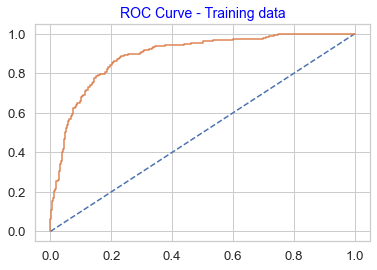

In [147]:
#Calculating AUC and plotting ROC curve for training data:

probs = best_LR_model.predict_proba(x_train)
probs = probs[:, 1]

best_lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % best_lr_train_auc)

%matplotlib inline
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);
plt.title("ROC Curve - Training data",color='blue',fontsize=14)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.75      0.65      0.69       307

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061
 



Text(0.5, 1.0, 'Confusion matrix - Training data')

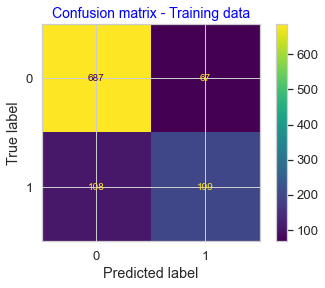

In [148]:
#Confusion matrix on the training data:

plot_confusion_matrix(best_LR_model,x_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');
plt.title("Confusion matrix - Training data",color='blue',fontsize=14)

AUC: 0.877


Text(0.5, 1.0, 'ROC Curve - Test data')

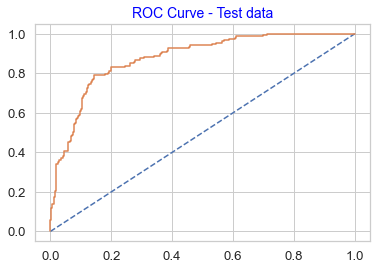

In [149]:
#Calculating AUC and plotting ROC curve for test data:

probs = best_LR_model.predict_proba(x_test)
probs = probs[:, 1]

best_lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % best_lr_test_auc)

%matplotlib inline
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);
plt.title("ROC Curve - Test data",color='blue',fontsize=14)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.76      0.73      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



Text(0.5, 1.0, 'Confusion matrix - Test data')

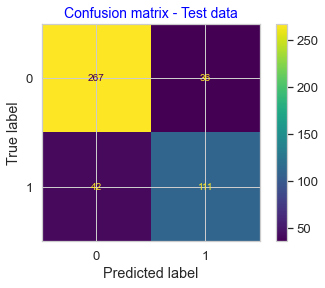

In [150]:
# Confusion matrix on the test data:

plot_confusion_matrix(best_LR_model,x_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');
plt.title("Confusion matrix - Test data",color='blue',fontsize=14)

In [151]:
#Storing data for future comparison:

index=['AUC','Accuracy','Recall','Precision','F1 Score']
tuned_LR_data = pd.DataFrame({'Best_LR Train':[0.89,0.84,0.65,0.75,0.69],
                     'Best_LR Test':[0.88,0.83,0.73,0.76,0.74]},index=index)
round(tuned_LR_data,2)

,Best_LR Train,Best_LR Test
AUC,0.89,0.88
Accuracy,0.84,0.83
Recall,0.65,0.73
Precision,0.75,0.76
F1 Score,0.69,0.74


## Fine-tuning the LDA model:

In [152]:
#Splitting the data into train and test sets:

x = data2.drop('vote', axis=1)
y = data2[['vote']]

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)


In [154]:
#Building tuned_LDA Model:

tuned_LDA = LinearDiscriminantAnalysis()
model=tuned_LDA.fit(x_train,y_train)

In [155]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(x_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(x_test)

0.1 

Accuracy Score 0.6984
F1 Score 0.6429 

Confusion Matrix


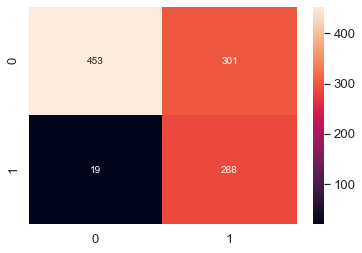

0.2 

Accuracy Score 0.7879
F1 Score 0.7066 

Confusion Matrix


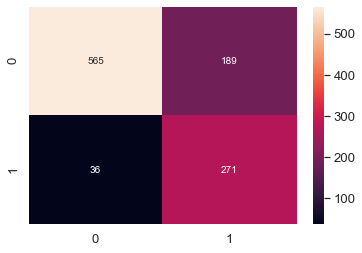

0.3 

Accuracy Score 0.8303
F1 Score 0.7361 

Confusion Matrix


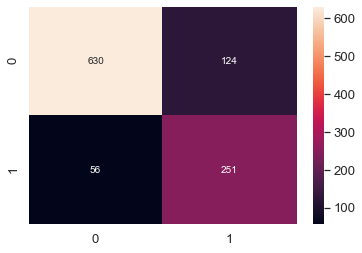

0.4 

Accuracy Score 0.8294
F1 Score 0.7085 

Confusion Matrix


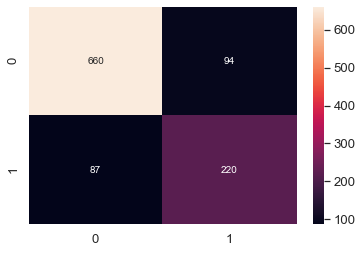

0.5 

Accuracy Score 0.8341
F1 Score 0.6944 

Confusion Matrix


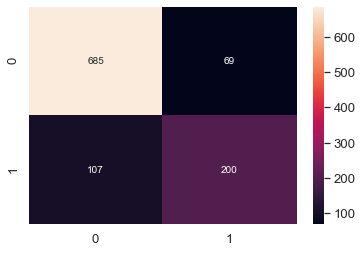

0.6 

Accuracy Score 0.8351
F1 Score 0.6704 

Confusion Matrix


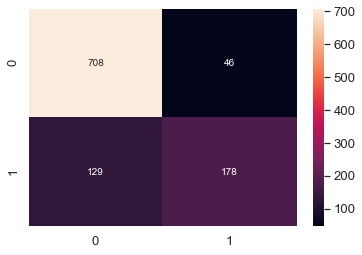

0.7 

Accuracy Score 0.8143
F1 Score 0.5971 

Confusion Matrix


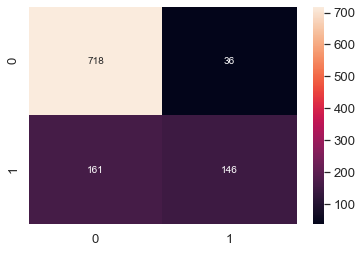

0.8 

Accuracy Score 0.7936
F1 Score 0.5056 

Confusion Matrix


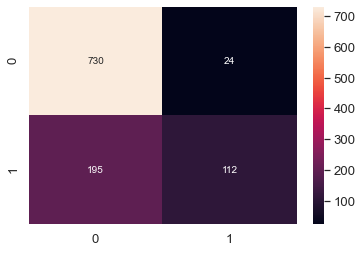

0.9 

Accuracy Score 0.7615
F1 Score 0.336 

Confusion Matrix


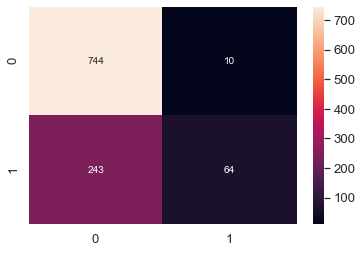

In [156]:
#Trying out different cut-off values to find the best LDA model: (this excercise to be done only on training data)

for j in np.arange(0.1,1,0.1):
    custom_prob = j 
    custom_cutoff_data=[]
    for i in range(0,len(y_train)):
        if np.array(pred_prob_train[:,1])[i] > custom_prob:
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

## Using cut-off 0.3 to further tune the model:

In [164]:
#Predicting the classes on the train data:

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_train[:,1])):
    if np.array(pred_prob_train[:,1])[i]>0.3:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [165]:
print('Classification Report of the custom cut-off train data:\n\n',metrics.classification_report(y_train,data_pred_custom_cutoff),'\n')

Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.92      0.84      0.88       754
           1       0.67      0.82      0.74       307

    accuracy                           0.83      1061
   macro avg       0.79      0.83      0.81      1061
weighted avg       0.85      0.83      0.83      1061
 



In [157]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.3:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

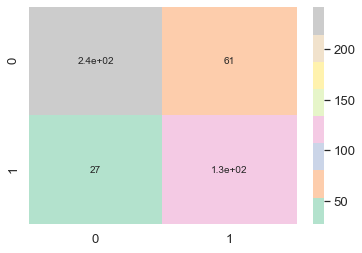

In [158]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,linecolor='black',cmap='Pastel2');

In [159]:
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.90      0.80      0.85       303
           1       0.67      0.82      0.74       153

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.82      0.81      0.81       456
 



AUC for the Tuned Test Data: 0.890


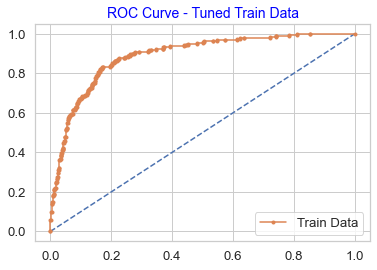

In [162]:
#AUC and ROC for the train data:

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Tuned Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Train Data')
# show the plot
plt.legend(loc='best')
plt.title("ROC Curve - Tuned Train Data",color='blue',fontsize=14)
plt.show()

AUC for the Tuned Test Data: 0.888


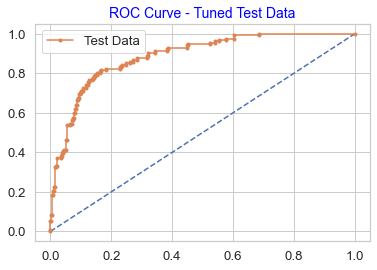

In [160]:
 #AUC and ROC for the test data:

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Tuned Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.title("ROC Curve - Tuned Test Data",color='blue',fontsize=14)
plt.show()

In [207]:
#Storing data for future comparison:

index=['Accuracy', 'AUC','Recall','Precision','F1 Score']
Tuned_LDA_data = pd.DataFrame({'LDA Tuned Train':[0.83,0.89,0.82,0.67,0.74],
    'LDA Tuned Test':[0.81,0.88,0.82,0.67,0.74]},index=index)
round(Tuned_LDA_data,2)

,LDA Tuned Train,LDA Tuned Test
Accuracy,0.83,0.81
AUC,0.89,0.88
Recall,0.82,0.82
Precision,0.67,0.67
F1 Score,0.74,0.74


## Tuning Gaussian Naive Bayes model using cross-validation:

In [167]:
tuned_gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [168]:
param_grid_gnb={'var_smoothing':np.logspace(0,-9,num=100)}

In [169]:
gnb_grid=GridSearchCV(estimator=GaussianNB(),param_grid=param_grid_gnb,verbose=1,cv=10,n_jobs=-1)

In [170]:
gnb_grid.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [173]:
y_pred=gnb_grid.predict(x_train)

#Evaluating the Tuned GNB model on train data:

model_score = gnb.score(x_train, y_train)                    
print(model_score)
print(metrics.confusion_matrix(y_train, y_pred))         
print(metrics.classification_report(y_train, y_pred)) 

0.8341187558906692
[[677  77]
 [ 97 210]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       754
           1       0.73      0.68      0.71       307

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [174]:
y_pred=gnb_grid.predict(x_test)

In [175]:
#Evaluating the Tuned GNB model on test data:

model_score = gnb.score(x_test, y_test)                    
print(model_score)
print(metrics.confusion_matrix(y_test, y_pred))         
print(metrics.classification_report(y_test, y_pred)) 

0.8223684210526315
[[265  38]
 [ 42 111]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       303
           1       0.74      0.73      0.74       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [176]:
#Storing tuned data for future comparison:

index=['Model score','Recall','Precision','F1 Score']
tuned_gnb_data = pd.DataFrame({'Best_GNB Train':[0.84,0.68,0.73,0.71],
                     'Best_GNB Test':[0.82,0.73,0.74,0.74]},index=index)
round(tuned_gnb_data,2)

,Best_GNB Train,Best_GNB Test
Model score,0.84,0.82
Recall,0.68,0.73
Precision,0.73,0.74
F1 Score,0.71,0.74


## Fine tuning the KNN model using k=1,3,5,7,...19 

In [177]:
# Creating an empty list that will hold accuracy scores:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # evaluate test accuracy
    scores = knn.score(x_test, y_test)
    ac_scores.append(scores)

# Finding misclassification error (MCE):
MCE = [1 - x for x in ac_scores]
MCE

[0.2192982456140351,
 0.21052631578947367,
 0.1842105263157895,
 0.17543859649122806,
 0.19298245614035092,
 0.19517543859649122,
 0.19736842105263153,
 0.19298245614035092,
 0.20175438596491224,
 0.19517543859649122]

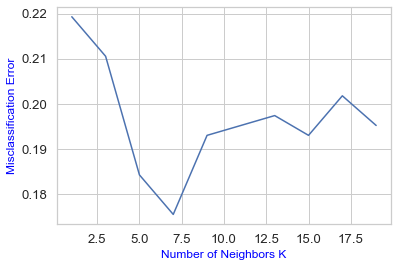

In [178]:
#Plotting MCE v/s K values:

plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K',color='blue',fontsize=12)
plt.ylabel('Misclassification Error',color='blue',fontsize=12)
plt.show()

In [179]:
# k=7 gives the least MCE, hence has highest accuracy
#Rebuilding the KNN model using k=7

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [180]:
## Performance Matrix on tuned train data set:

y_train_predict = KNN_model.predict(x_train)
model_score = KNN_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8482563619227145
[[698  56]
 [105 202]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       754
           1       0.78      0.66      0.72       307

    accuracy                           0.85      1061
   macro avg       0.83      0.79      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [181]:
## Performance Matrix on tuned test data set:

y_test_predict = KNN_model.predict(x_test)
model_score = KNN_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[277  26]
 [ 54  99]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       303
           1       0.79      0.65      0.71       153

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [182]:
#Storing data for future comparison:

index=['Model score','Recall','Precision','F1 Score']
tuned_knn_data = pd.DataFrame({'Tuned_KNN Train':[0.85,0.66,0.78,0.72],
                     'Tuned_KNN Test':[0.82,0.65,0.79,0.71]},index=index)
round(tuned_knn_data,2)

,Tuned_KNN Train,Tuned_KNN Test
Model score,0.85,0.82
Recall,0.66,0.65
Precision,0.78,0.79
F1 Score,0.72,0.71


## Using GridSearchCV to fine-tune KNN model:

In [183]:
knn=KNeighborsClassifier()
params={'n_neighbors':[4,6,8,10,12],'weights':['distance'],'leaf_size':[30,50],'algorithm':['auto','kd_tree'],'n_jobs':[-1]}

In [184]:
grid_search=GridSearchCV(estimator=knn,param_grid=params,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [30, 50], 'n_jobs': [-1],
                         'n_neighbors': [4, 6, 8, 10, 12],
                         'weights': ['distance']})

In [185]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)


{'algorithm': 'auto', 'leaf_size': 30, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'} 

KNeighborsClassifier(n_jobs=-1, n_neighbors=10, weights='distance')


In [186]:
best_KNN_model = grid_search.best_estimator_

In [187]:
 #Prediction on the training set:

ytrain_predict = best_KNN_model.predict(x_train)
ytest_predict = best_KNN_model.predict(x_test)

In [188]:
# Getting the probabilities on the test set:

ytest_predict_prob=best_KNN_model.predict_proba(x_test)

AUC: 1.000


Text(0.5, 1.0, 'ROC Curve - Training data')

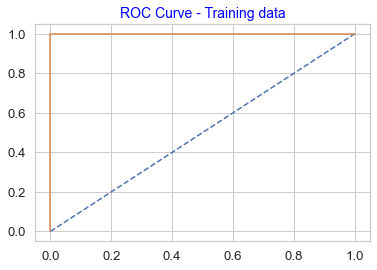

In [189]:
#Calculating AUC and plotting ROC curve for training data:

probs = best_KNN_model.predict_proba(x_train)
probs = probs[:, 1]

best_knn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % best_knn_train_auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);
plt.title("ROC Curve - Training data",color='blue',fontsize=14)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       307

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 



Text(0.5, 1.0, 'Confusion matrix - Training data')

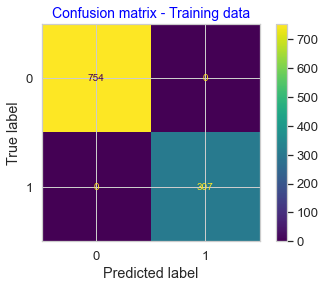

In [190]:
#Confusion matrix on the training data:

plot_confusion_matrix(best_KNN_model,x_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');
plt.title("Confusion matrix - Training data",color='blue',fontsize=14)

AUC: 0.870


Text(0.5, 1.0, 'ROC Curve - Test data')

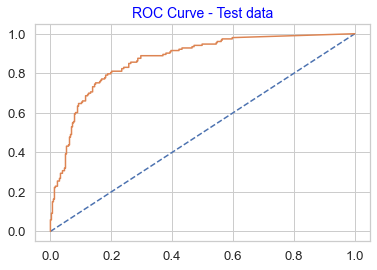

In [191]:
#Calculating AUC and plotting ROC curve for test data:

probs = best_KNN_model.predict_proba(x_test)
probs = probs[:, 1]

best_knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % best_knn_test_auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);
plt.title("ROC Curve - Test data",color='blue',fontsize=14)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       303
           1       0.78      0.63      0.70       153

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456
 



Text(0.5, 1.0, 'Confusion matrix - Test data')

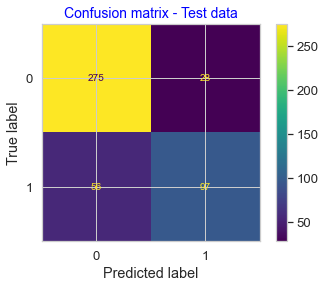

In [192]:
# Confusion matrix on the test data:

plot_confusion_matrix(best_KNN_model,x_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');
plt.title("Confusion matrix - Test data",color='blue',fontsize=14)

In [193]:
#Storing data for future comparison:

index=['Model score','Recall','Precision','F1 Score']
best_knn_data = pd.DataFrame({'Best_KNN Train':[1.0,1.0,1.0,1.0],
                     'Best_KNN Test':[0.82,0.63,0.78,0.70]},index=index)
round(best_knn_data,2)

,Best_KNN Train,Best_KNN Test
Model score,1.0,0.82
Recall,1.0,0.63
Precision,1.0,0.78
F1 Score,1.0,0.70


## Using Ensemble Learning - Bagging Classifier:

In [194]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
bgcl = BaggingClassifier(base_estimator=RandomForestClassifier(),max_features=7 ,n_estimators=40,random_state=1)
bgcl = bgcl.fit(x_train, y_train)


0.9688972667295005
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       754
           1       0.99      0.91      0.94       307

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061
 



Text(0.5, 1.0, 'Confusion matrix - Train data')

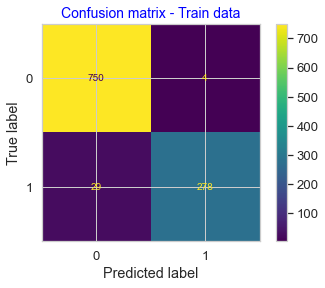

In [195]:
#Predicting on the train data:

y_predict = bgcl.predict(x_train)

print(bgcl.score(x_train , y_train))
plot_confusion_matrix(bgcl,x_train,y_train)
print(classification_report(y_train, y_predict),'\n');
plt.title("Confusion matrix - Train data",color='blue',fontsize=14)


0.8289473684210527
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       303
           1       0.80      0.66      0.72       153

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456
 



Text(0.5, 1.0, 'Confusion matrix - Test data')

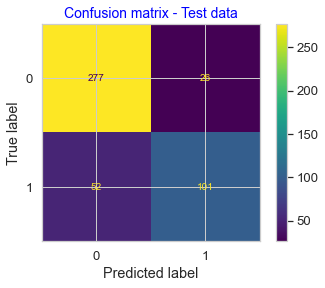

In [196]:
##Predicting on the test data:

y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))
plot_confusion_matrix(bgcl,x_test,y_test)
print(classification_report(y_test, y_predict),'\n');
plt.title("Confusion matrix - Test data",color='blue',fontsize=14)


In [198]:
#Storing data for future comparison:

index=['Model score','Recall','Precision','F1 Score']
bagging_data = pd.DataFrame({'Bagging Train':[0.97,0.91,0.97,0.94],
    'Bagging Test':[0.83,0.66,0.80,0.72]},index=index)
round(bagging_data,2)

,Bagging Train,Bagging Test
Model score,0.97,0.83
Recall,0.91,0.66
Precision,0.97,0.80
F1 Score,0.94,0.72


## Ensemble Learning - AdaBoosting:

In [199]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=30, random_state=1)
abcl = abcl.fit(x_train, y_train)

0.8491988689915174
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       754
           1       0.77      0.68      0.72       307

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 



Text(0.5, 1.0, 'Confusion matrix - Train data')

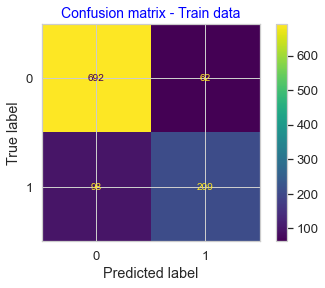

In [200]:
#Predicting on the train data:

y_predict = abcl.predict(x_train)

print(abcl.score(x_train , y_train))
plot_confusion_matrix(abcl,x_train,y_train)
print(classification_report(y_train, y_predict),'\n');
plt.title("Confusion matrix - Train data",color='blue',fontsize=14)


0.8114035087719298
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       303
           1       0.74      0.68      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.81      0.81      0.81       456
 



Text(0.5, 1.0, 'Confusion matrix - Test data')

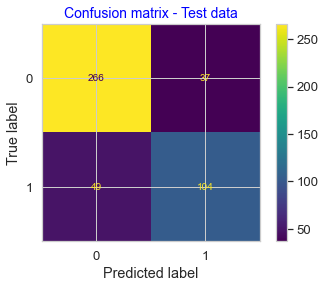

In [201]:
#Predicting on the test data:

y_predict = abcl.predict(x_test)

print(abcl.score(x_test , y_test))
plot_confusion_matrix(abcl,x_test,y_test)
print(classification_report(y_test, y_predict),'\n');
plt.title("Confusion matrix - Test data",color='blue',fontsize=14)


In [202]:
#Storing data for future comparison:

index=['Model score','Recall','Precision','F1 Score']
adaboost_data = pd.DataFrame({'Ada_Boost Train':[0.85,0.68,0.77,0.72],
    'Ada_Boost Test':[0.81,0.68,0.74,0.71]},index=index)
round(adaboost_data,2)

,Ada_Boost Train,Ada_Boost Test
Model score,0.85,0.81
Recall,0.68,0.68
Precision,0.77,0.74
F1 Score,0.72,0.71


## Ensemble Learning - Gradient Boosting:

In [203]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 70,random_state=1)
gbcl = gbcl.fit(x_train, y_train)


0.8850141376060321
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       754
           1       0.83      0.76      0.79       307

    accuracy                           0.89      1061
   macro avg       0.87      0.85      0.86      1061
weighted avg       0.88      0.89      0.88      1061
 



Text(0.5, 1.0, 'Confusion matrix - Train data')

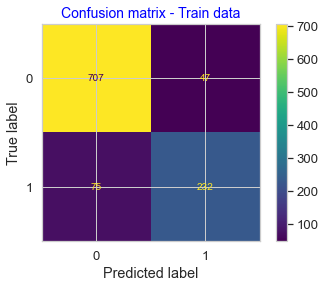

In [204]:
#Predicting on the train data:

y_predict = gbcl.predict(x_train)

print(gbcl.score(x_train , y_train))
plot_confusion_matrix(gbcl,x_train,y_train)
print(classification_report(y_train, y_predict),'\n');
plt.title("Confusion matrix - Train data",color='blue',fontsize=14)


0.8223684210526315
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       303
           1       0.78      0.65      0.71       153

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456
 



Text(0.5, 1.0, 'Confusion matrix - Test data')

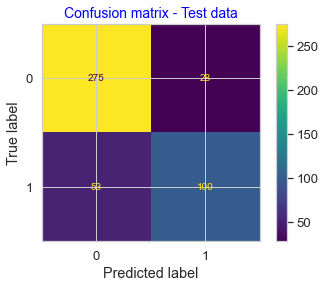

In [205]:
#Predicting on the test data:

y_predict = gbcl.predict(x_test)

print(gbcl.score(x_test , y_test))
plot_confusion_matrix(gbcl,x_test,y_test)
print(classification_report(y_test, y_predict),'\n');
plt.title("Confusion matrix - Test data",color='blue',fontsize=14)


In [206]:
#Storing data for future comparison:

index=['Model score','Recall','Precision','F1 Score']
gradboost_data = pd.DataFrame({'Grad_Boost Train':[0.89,0.76,0.83,0.79],
    'Grad_Boost Test':[0.82,0.65,0.78,0.71]},index=index)
round(gradboost_data,2)

,Grad_Boost Train,Grad_Boost Test
Model score,0.89,0.82
Recall,0.76,0.65
Precision,0.83,0.78
F1 Score,0.79,0.71


In [ ]:
##The end...